In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from SALib.sample import saltelli
from SALib.analyze import sobol
import seaborn as sns
import fullmodel_v1_8
from Extract_dataV2 import extractData
from datetime import datetime, timedelta
from matplotlib.ticker import ScalarFormatter
import matplotlib.cm as cm
from matplotlib.ticker import MaxNLocator

In [2]:
model_CyB = fullmodel_v1_8.modelCyB()
day_start = pd.to_datetime("2023-05-01").day_of_year

days_end = pd.to_datetime("2023-09-30").day_of_year

model_CyB.t_0 = 0  # May 1, 2023

model_CyB.t_f = days_end - day_start

model_CyB.delta_t = model_CyB.t_f*3

model_CyB.set_linetime()

## Sobol Analysis

In [3]:
InfoLakes = {'PIGEON LAKE': {'labels': ['MICROCYSTIN, TOTAL',
                              'PHOSPHORUS TOTAL DISSOLVED',
                              'OXYGEN DISSOLVED (FIELD METER)',
                              'Total cyanobacterial cell count (cells/mL)',
                              'TEMPERATURE WATER'],
                              'Years': ['2021'],
                              'DataBase':'merged_water_quality_data.csv',
                              'InitialP':0.05,
                              'InitialO2': 6  },
                
             'PINE LAKE': {'labels': ['MICROCYSTIN, TOTAL',
                              'PHOSPHORUS TOTAL DISSOLVED',
                              'OXYGEN DISSOLVED (FIELD METER)',
                              'Total cyanobacterial cell count (cells/mL)',
                              'TEMPERATURE WATER'],
                              'Years': ['2017'],
                              'DataBase':'merged_water_quality_data.csv',
                              'InitialP':0.4,
                              'InitialO2': 6  },
                             
            'MENDOTA LAKE': {'labels':['Microcystin (nM)',
                                      'OXYGEN DISSOLVED (FIELD METER)',
                                      'Total cyanobacterial cell count (cells/mL)'],
                            'Years':['2018'],
                            'DataBase':'Dataset_US.csv',
                            'InitialP':0.075,
                            'InitialO2': 5 },
                             
            'MONONA LAKE': {'labels':['OXYGEN DISSOLVED (FIELD METER)',
                                          'Total cyanobacterial cell count (cells/mL)',
                                          'TEMPERATURE WATER'],
                            'Years':['2015'],
                            'DataBase':'Combined_Data_for_MO_Merged.csv',
                            'InitialP':0.075,
                            'InitialO2': 5 }}

In [4]:
lake_name = 'PIGEON LAKE'
yearname = ''
for year in InfoLakes[lake_name]['Years']:
    yearname = yearname + str(year) + '_'
path = "./Sobol_Index/"+lake_name + '/'+yearname
# Save the DataFrame to a CSV file
y1 = pd.read_csv(path + lake_name+'.csv', header=None)
y1 = y1.to_numpy()
# analyse
problem = {
    'num_vars': 6,
    'names': ['z_m',
              'd_E',
              'z_mK_bg',
              'p_in',
              'P_0',
              'Temp'],
    'bounds': [[0, 2.75], 
               [0.02, 0.12], 
               [0.3, 1.0], 
               [0.01, 0.4], 
               [0.01, 0.4], 
               [0, 3.4]

               ]
}



## Sobol Index

In [5]:
sobol_indices = [sobol.analyze(problem, Y) for Y in y1.T]

C:\Users\brian\anaconda3\envs\python\lib\site-packages\SALib\analyze\sobol.py:129: RuntimeWarning: invalid value encountered in divide
  Y = (Y - Y.mean()) / Y.std()


In [6]:
len(sobol_indices) , y1.shape

(456, (14336, 456))

In [7]:
def generate_dates(year):
    dates = []
    for month in range(5, 10):  # January to December
        next_month = month + 1 if month < 12 else 1  # Handle December
        # Handle December crossing into the next year
        next_year = year + 1 if month == 12 else year

        max_day = (datetime(next_year, next_month, 1) - timedelta(days=1)).day
        for day in range(1, max_day + 1, 1):
            start_date = datetime(year, month, day)
            # Adding one day to get the end date
            dates.append(start_date.strftime("%Y-%m-%d"))
    return dates

In [8]:
FigsizeAll = (11 / 2.54, 11 / 2.54)
# FigsizeSome = (7.5 / 2.54, 10.5 / 2.54)
FigsizeSome =(7.5 / 2.54, 5.5 / 2.54)
FORMAT = '.pdf'
FONTSIZE = 7
RESOLUTION = 900
NoBins = 25
SpaceDates = 5  # Space between dates to be plotted base on NoBins
Start_day = 0 #120  # Check dates
End_day = 365 #340
TIMEStap = (Start_day*3, End_day*3+1)  # Time to plot
dates = generate_dates(2021)
DATES = [date[5:] for date in dates][Start_day:End_day+1]
tick_len = 4  # Length for ticks with labels
other_tick_len = 2  # Length for other ticks
hspace = 0.35
wspace = 0.6
FONTSIZETITLE = 8
linewidth = 1
LegendWidth = 2
box_position = (0.55, 0.991) #right, hight
SAVE_PLOT = False
# colors = cm.Set1_r(np.linspace(0.25, 1, problem['num_vars'])) #[110,158,206]
colors = np.array([np.array([9, 99, 189])/255,
          np.array([78,149,149])/255,
          np.array([141,106,184])/255,
          np.array([132,87,77])/255,
          np.array([233,169,107])/255,
          np.array([230,146,143])/255])

colors = ["#2f4c6b",
"#984ea3",
"#5e5522",
"#dc9650",
"#995528",
"#bb3039"]

colors = ["#13313f",
"#66829a",
"#536642",
"#cabe45",
"#995528",
"#bb3039"]

colors = ["#13313f",
"#66829a",
"#85a369",
"#cedc65",
"#6a4c92",
"#bb3039"]

C:\Users\brian\AppData\Local\Temp\ipykernel_13288\2205327531.py:191: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for lineleg in legend.legendHandles:


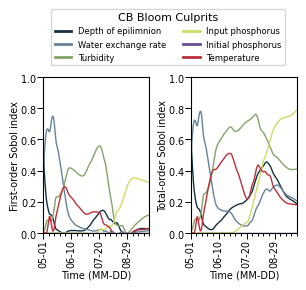

In [9]:
# Set the y-axis formatter to use scientific notation
y_formatter = ScalarFormatter(useMathText=True, useOffset=False)
y_formatter.set_powerlimits((-3, 4))  # Adjust the power limits as needed
y_formatter.orderOfMagnitude = 4  # Set the exponent to 4
# fig, axs = plt.subplots(1, 3, figsize=FigsizeSome)
# axs = axs.ravel()



fig = plt.figure(figsize=FigsizeSome, constrained_layout=True)
gs = fig.add_gridspec(1, 2)

# ax0 = fig.add_subplot(gs[:, 0])
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])

S1s = np.array([s['S1'] for s in sobol_indices])
STs = np.array([s['ST'] for s in sobol_indices])

names = ['Depth of epilimnion',
        'Water exchange rate',
        'Turbidity',
        'Input phosphorus',
        'Initial phosphorus',
        'Temperature']


max_values = 0
min_values = 0
for i in range(problem['num_vars']):
    
        # var = solution.T[variables.index(variables[i])]

        ax1.yaxis.set_major_formatter(y_formatter)

        ax1.tick_params(axis='y', labelsize=FONTSIZE,
                               pad=0.5)
        ax1.tick_params(axis='x', labelsize=FONTSIZE,
                               pad=0.5)

        for spine in ax1.spines.values():
            spine.set_color('black')  # Set all spines color to black

        ax1.tick_params(axis='both', which='both', bottom=True, top=False,
                               left=True, right=False, direction='out',
                               length=tick_len, width=0.7, colors='black')

        ax1.set_ylabel('First-order Sobol index', fontsize=FONTSIZE,
                              labelpad=0)

        max_values = max(
                max_values, S1s[:,i][TIMEStap[0]:TIMEStap[1]].max())
        min_values = min(
                min_values, S1s[:,i][TIMEStap[0]:TIMEStap[1]].min())

        ax1.set_ylim(min_values*(1-0.05)*0, max_values * (1+0.1)*0+1)
        ax1.set_xlim(model_CyB.t[TIMEStap[0]:TIMEStap[1]].min(),
                            model_CyB.t[TIMEStap[0]:TIMEStap[1]].max())

        ax1.xaxis.set_major_locator(
                MaxNLocator(integer=True, nbins=NoBins))

        x_ticks = ax1.xaxis.get_ticklocs()
        x_ticks = [tick for tick in x_ticks if tick <= 365]
        if len(dates) >= len(x_ticks):
            # max_tick = x_ticks.max()
            # No_days = len(DATES)
            

            x_labels = [''] * len(x_ticks)

                
            x_labels[::SpaceDates] = [dates[int(x_val)][5:]
                                          for x_val in x_ticks[:: SpaceDates] if x_val <= 365]
            ax1.set_xticks(x_ticks)

            ax1.xaxis.set_ticklabels(x_labels,
                                            rotation=90,
                                            fontsize=FONTSIZE)

            # Adjust the length of ticks with labels
            for tick in ax1.xaxis.get_major_ticks():
                if tick.label1.get_text():  # Check if tick has a label
                    tick.tick1line.set_markersize(tick_len)
                        
                else:
                    tick.tick1line.set_markersize(other_tick_len)
                        
        else:
            x_labels = dates
            ax1.xaxis.set_ticklabels(x_labels,
                                            rotation=30)
        ax1.set_xlabel('Time (MM-DD)', fontsize=FONTSIZE,
                              labelpad=2)
        ax1.grid(False)
        color_index = i

        line, = ax1.plot(model_CyB.t, S1s[:,i], color=colors[color_index],
                                    label=names[i],
                                    linewidth=linewidth)


max_values = 0
min_values = 0
for i in range(problem['num_vars']):
    
        # var = solution.T[variables.index(variables[i])]

        ax2.yaxis.set_major_formatter(y_formatter)

        ax2.tick_params(axis='y', labelsize=FONTSIZE,
                               pad=0.5)
        ax2.tick_params(axis='x', labelsize=FONTSIZE,
                               pad=0.5)

        for spine in ax2.spines.values():
            spine.set_color('black')  # Set all spines color to black

        ax2.tick_params(axis='both', which='both', bottom=True, top=False,
                               left=True, right=False, direction='out',
                               length=tick_len, width=0.7, colors='black')

        ax2.set_ylabel( 'Total-order Sobol index', fontsize=FONTSIZE,
                              labelpad=0)

        max_values = max(
                max_values, STs[:,i][TIMEStap[0]:TIMEStap[1]].max())
        min_values = min(
                min_values, STs[:,i][TIMEStap[0]:TIMEStap[1]].min())

        ax2.set_ylim(min_values*(1-0.05)*0, max_values * (1+0.1)*0+1)
        ax2.set_xlim(model_CyB.t[TIMEStap[0]:TIMEStap[1]].min(),
                            model_CyB.t[TIMEStap[0]:TIMEStap[1]].max())

        ax2.xaxis.set_major_locator(
                MaxNLocator(integer=True, nbins=NoBins))

        x_ticks = ax2.xaxis.get_ticklocs()
        x_ticks = [tick for tick in x_ticks if tick <= 365]
        if len(dates) >= len(x_ticks):
            # max_tick = x_ticks.max()
            # No_days = len(DATES)
            

            x_labels = [''] * len(x_ticks)

                
            x_labels[::SpaceDates] = [dates[int(x_val)][5:]
                                          for x_val in x_ticks[:: SpaceDates] if x_val <= 365]
            ax2.set_xticks(x_ticks)

            ax2.xaxis.set_ticklabels(x_labels,
                                            rotation=90,
                                            fontsize=FONTSIZE)

            # Adjust the length of ticks with labels
            for tick in ax2.xaxis.get_major_ticks():
                if tick.label1.get_text():  # Check if tick has a label
                    tick.tick1line.set_markersize(tick_len)
                        
                else:
                    tick.tick1line.set_markersize(other_tick_len)
                        
        else:
            x_labels = dates
            ax1.xaxis.set_ticklabels(x_labels,
                                            rotation=30)
        ax2.set_xlabel('Time (MM-DD)', fontsize=FONTSIZE,
                              labelpad=2)
        ax2.grid(False)
        color_index = i

        line, = ax2.plot(model_CyB.t, STs[:,i], color=colors[color_index],
                                    label=problem['names'][i],
                                    linewidth=linewidth)


 

# MEAN Value plot
# in percent

handles, labels = ax1.get_legend_handles_labels()

legend = fig.legend(handles, labels, loc='outside lower center',
                            bbox_to_anchor=box_position,
                            fancybox=True, shadow=False, ncol=2,
                            title='CB Bloom Culprits',
                            fontsize=FONTSIZE-1,
                            title_fontsize=FONTSIZETITLE)
for lineleg in legend.legendHandles:
        lineleg.set_linewidth(LegendWidth)


if SAVE_PLOT:
    # Save plots
    dfS1 = pd.DataFrame(S1s)
    dfS1.to_csv(path + lake_name+'SobolFirst'+'.csv', header=False, index=False)
    dfST = pd.DataFrame(STs)
    dfST.to_csv(path + lake_name+'SobolTotal'+'.csv', header=False, index=False)
    plt.savefig(path + lake_name +'CB_Sobol_index'+FORMAT, dpi=RESOLUTION, bbox_inches='tight')
    print('Image was saved')
    # Show the plot
plt.show()

# Bar Plots

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.cm as cm

In [11]:
InfoLakes = {'PIGEON LAKE': {'labels': ['MICROCYSTIN, TOTAL',
                              'PHOSPHORUS TOTAL DISSOLVED',
                              'OXYGEN DISSOLVED (FIELD METER)',
                              'Total cyanobacterial cell count (cells/mL)',
                              'TEMPERATURE WATER'],
                              'Years': ['2021'],
                              'DataBase':'merged_water_quality_data.csv',
                              'InitialP':0.05,
                              'InitialO2': 6  },
                
             'PINE LAKE': {'labels': ['MICROCYSTIN, TOTAL',
                              'PHOSPHORUS TOTAL DISSOLVED',
                              'OXYGEN DISSOLVED (FIELD METER)',
                              'Total cyanobacterial cell count (cells/mL)',
                              'TEMPERATURE WATER'],
                              'Years': ['2017'],
                              'DataBase':'merged_water_quality_data.csv',
                              'InitialP':0.4,
                              'InitialO2': 6  },
                             
            'MENDOTA LAKE': {'labels':['Microcystin (nM)',
                                      'OXYGEN DISSOLVED (FIELD METER)',
                                      'Total cyanobacterial cell count (cells/mL)'],
                            'Years':['2018'],
                            'DataBase':'Dataset_US.csv',
                            'InitialP':0.075,
                            'InitialO2': 5 },
                             
            'MONONA LAKE': {'labels':['OXYGEN DISSOLVED (FIELD METER)',
                                          'Total cyanobacterial cell count (cells/mL)',
                                          'TEMPERATURE WATER'],
                            'Years':['2015'],
                            'DataBase':'Combined_Data_for_MO_Merged.csv',
                            'InitialP':0.075,
                            'InitialO2': 5 }}

In [12]:
FigsizeSome =(16, 8)
FORMAT = '.pdf'
FONTSIZE = 7*2
bar_width = 1.0
error_bars = 3
RESOLUTION = 900
SAVE_PLOT = False

C:\Users\brian\AppData\Local\Temp\ipykernel_13288\1367158264.py:48: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis', len(column_names))
C:\Users\brian\AppData\Local\Temp\ipykernel_13288\1367158264.py:133: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(right=0.8)


Image was saved


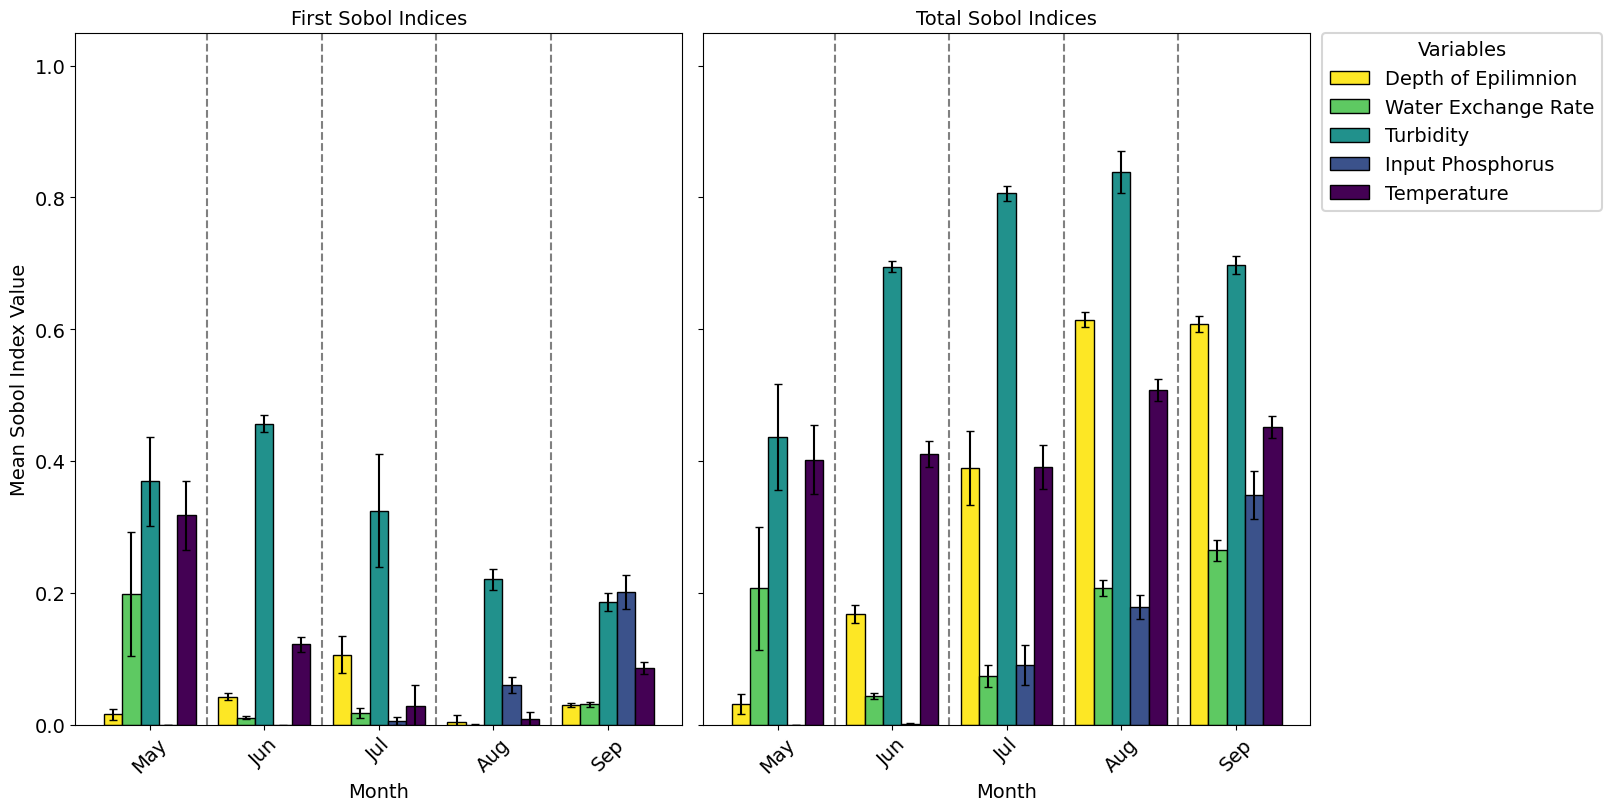

In [21]:
# Load data (assuming InfoLakes and file paths are correct)
lake_name = 'MENDOTA LAKE'
yearname = ''
for year in InfoLakes[lake_name]['Years']:
    yearname = yearname + str(year) + '_'
path = "./Sobol_Index/"+lake_name + '/'+yearname

first_sobol = pd.read_csv(path + lake_name+'SobolFirst'+'.csv', header=None).iloc[:, [0, 1, 2, 3, 5]]
total_sobol = pd.read_csv(path + lake_name+'SobolTotal'+'.csv', header=None).iloc[:, [0, 1, 2, 3, 5]]

# Columns
column_names = [
    "Depth of Epilimnion",
    "Water Exchange Rate",
    "Turbidity",
    "Input Phosphorus",
    "Temperature"
]
first_sobol.columns = column_names
total_sobol.columns = column_names

# Bin size and number of bins
bin_size = 31*3  # 15 days * 3 measurements per day
num_bins = (len(first_sobol) + bin_size - 1) // bin_size

# Assign bin numbers to each row
first_sobol['bin'] = (first_sobol.index // bin_size)
total_sobol['bin'] = (total_sobol.index // bin_size)

# Group by bin and compute the mean and standard deviation for each parameter
first_sobol_binned = first_sobol.groupby('bin').mean()
first_sobol_std = first_sobol.groupby('bin').std()*0.5
total_sobol_binned = total_sobol.groupby('bin').mean()
total_sobol_std = total_sobol.groupby('bin').std()*0.5

# Create date labels for the bins
date_labels = ['May', 'Jun', 'Jul', 'Aug', 'Sep'] 
first_sobol_binned.index = date_labels
total_sobol_binned.index = date_labels
first_sobol_std.index = date_labels
total_sobol_std.index = date_labels

# Colors
colors = ["#13313f", "#66829a", "#85a369", "#cedc65", "#6a4c92", "#bb3039"]
colors = ["#13313f", "#66829a", "#85a369", "#cedc65", "#bb3039"]

# Colours woo !!!
cmap = cm.get_cmap('viridis', len(column_names))
colors = [cmap(i) for i in range(len(column_names))]
colors.reverse()
variable_colors = dict(zip(column_names, colors))

# Font size option
font_size = FONTSIZE  # Set your desired font size

# Modify bar width to add space between bars
bar_width = 0.8  # Slightly reduce bar width to add space between bars

# Plot Format
fig, axes = plt.subplots(1, 2, figsize=FigsizeSome, sharey=True, constrained_layout=True)

# Plot the first Sobol indices (bars side by side) with error bars
first_sobol_binned.plot(
    kind='bar',
    stacked=False,  # Disable stacking
    ax=axes[0],
    color=colors,
    edgecolor='black',
    rot=45,      # Rotate x-axis labels
    width=bar_width,   # Adjust bar width
    yerr=first_sobol_std,  # Add error bars
    capsize=error_bars,    # Adjust cap size for error bars
    legend=False
)
axes[0].set_title('First Sobol Indices', fontsize=font_size)
axes[0].set_ylabel('Mean Sobol Index Value', fontsize=font_size)
axes[0].set_xlabel('Month', fontsize=font_size)

# Add vertical lines between months
for i in range(1, len(date_labels)):
    axes[0].axvline(x=i - 0.5, color='gray', linestyle='--')

# Adjust font size for ticks
axes[0].tick_params(axis='x', labelsize=font_size)
axes[0].tick_params(axis='y', labelsize=font_size)

# Plot the total Sobol indices (bars side by side) with error bars
total_sobol_binned.plot(
    kind='bar',
    stacked=False,  # Disable stacking
    ax=axes[1],
    color=colors,
    edgecolor='black',
    rot=45,      # Rotate x-axis labels
    width=bar_width,   # Adjust bar width
    yerr=total_sobol_std,  # Add error bars
    capsize=error_bars   # Adjust cap size for error bars
)
axes[1].set_title('Total Sobol Indices', fontsize=font_size)
axes[1].set_xlabel('Month', fontsize=font_size)

# Add vertical lines between months
for i in range(1, len(date_labels)):
    axes[1].axvline(x=i - 0.5, color='gray', linestyle='--')

# Adjust font size for ticks
axes[1].tick_params(axis='x', labelsize=font_size)
axes[1].tick_params(axis='y', labelsize=font_size)

# Set common y-axis limits
first_sobol_stacked_max = first_sobol_binned.sum(axis=1).max()
total_sobol_stacked_max = total_sobol_binned.sum(axis=1).max()
max_y = max(first_sobol_stacked_max, total_sobol_stacked_max)

axes[0].set_ylim(0, 1 * 1.05)  # Add 10% padding
axes[1].set_ylim(0, 1 * 1.05)

# Common legend outside
handles, labels = axes[1].get_legend_handles_labels()
legend = axes[1].legend(
    handles, labels,
    loc='upper left',
    bbox_to_anchor=(1.02, 1),
    borderaxespad=0,
    frameon=True,
    fancybox=True, shadow=False,
    fontsize=font_size
)
legend.set_title('Variables', prop={'size': font_size})
legend.get_frame().set_linewidth(1.5)

# Adjust the plot to ensure the legend is fully visible
plt.subplots_adjust(right=0.8)

if SAVE_PLOT:
    # Save plots
    plt.savefig(path + lake_name +'CB_Sobol_indexBar'+FORMAT, dpi=RESOLUTION, bbox_inches='tight')
    print('Image was saved')

# Show the plot
plt.show()
